# Lecture 8

In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import CosSignal, SinSignal, SquareSignal, Wave
from thinkdsp import decorate

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

mpl.rcParams['figure.dpi'] = 150

In [2]:
def h_omega_hat(omega_hat):
    return 0.2*np.exp(-1j*2*omega_hat) * (1 + 2 * np.cos(omega_hat) + 2 * np.cos(2* omega_hat))

In [13]:
def h_freq(freq):
    sampling_freq = 100
    omega_hat = 2*np.pi*freq*(1/sampling_freq)
    return 0.2*np.exp(-1j*2*omega_hat) * (1 + 2 * np.cos(omega_hat) + 2 * np.cos(2* omega_hat))

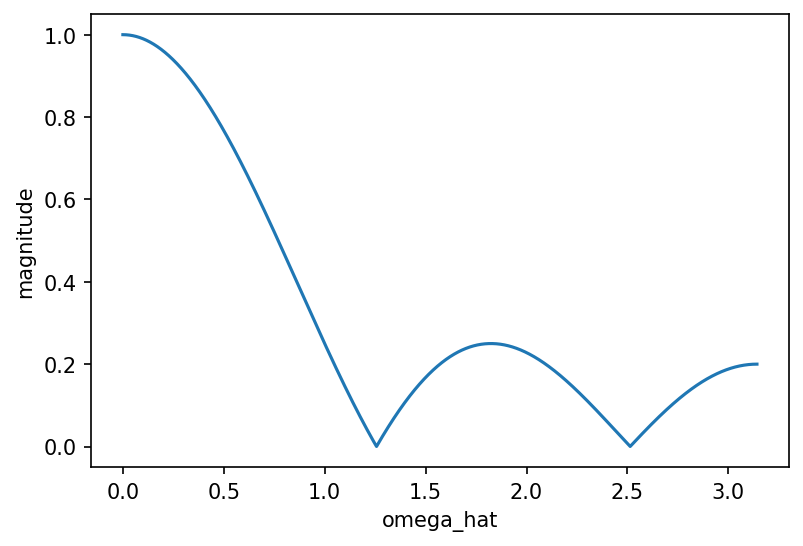

In [15]:
# h_omega_hat(10000)
omega_values = np.linspace(start=0, stop=np.pi, num=10000)
plt.plot(omega_values, np.abs(h_omega_hat(omega_values)))
plt.ylabel("magnitude")
plt.xlabel("omega_hat")
plt.show()

In [ ]:
plt.plot(omega_values, np.angle(h_omega_hat(omega_values)))
plt.ylabel("phase")
plt.xlabel("omega-hat")
plt.show()

"Actual frequency at 100 Hz sampling"

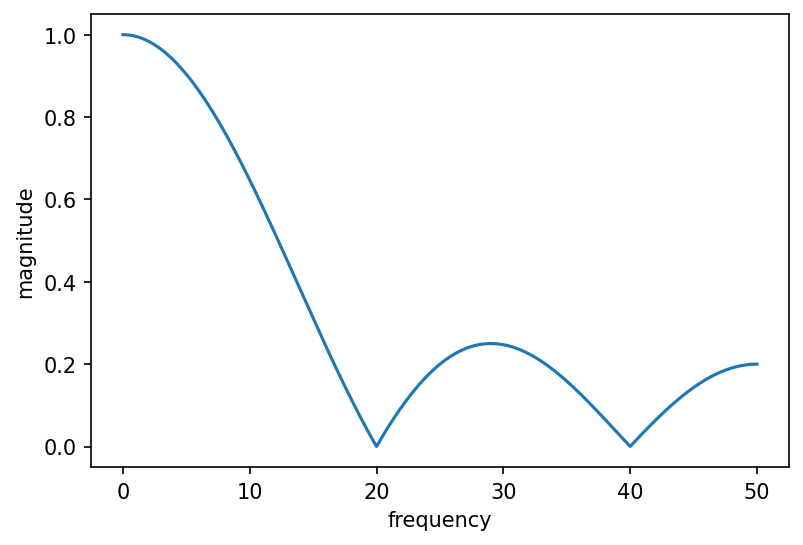

In [18]:
frequencies = np.linspace(start=0, stop=50, num=10000)
plt.plot(frequencies, np.abs(h_freq(frequencies)))
plt.ylabel("magnitude")
plt.xlabel("frequency")
plt.show()

# Trying out the moving average filter

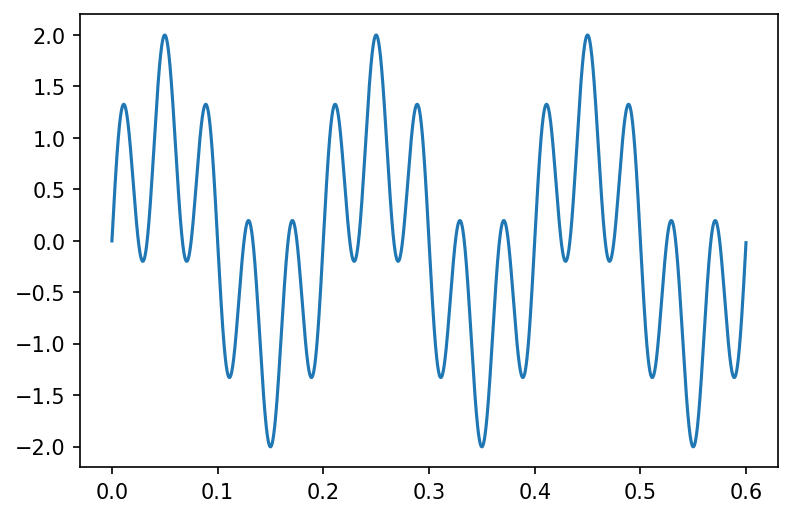

In [20]:
moving_average_filter_coeff = [0.2,0.2,0.2,0.2,0.2]
signal = SinSignal(freq=5)
signal2 = SinSignal(freq=25)
mix = signal + signal2
mix.plot()

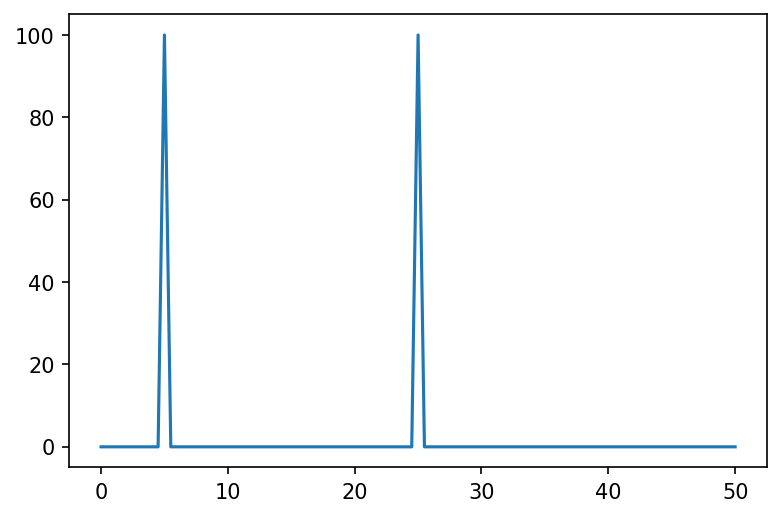

In [23]:
wave = mix.make_wave(duration=2, framerate=100)
segment = wave.segment(duration=2)
spectrum = segment.make_spectrum()
spectrum.plot()

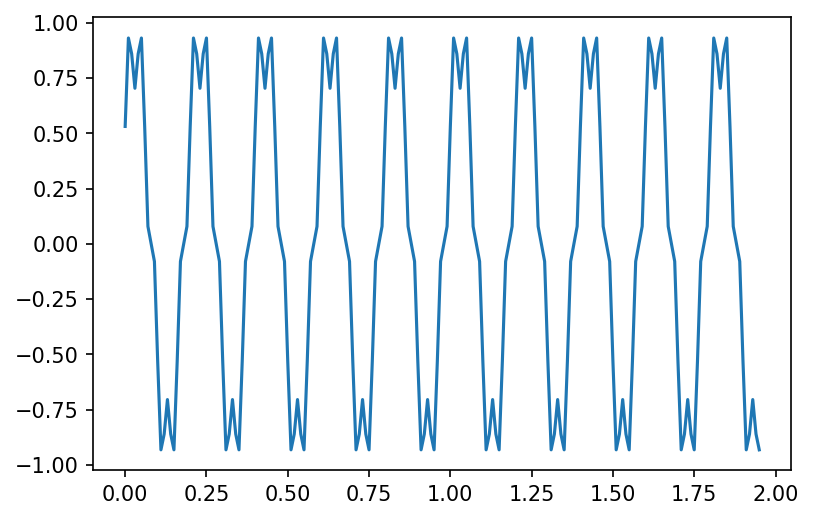

In [26]:
filtered = np.convolve(segment.ys, moving_average_filter_coeff, mode="valid")
# print(filtered)
new_wave = Wave(filtered, framerate=wave.framerate)
new_wave.plot()

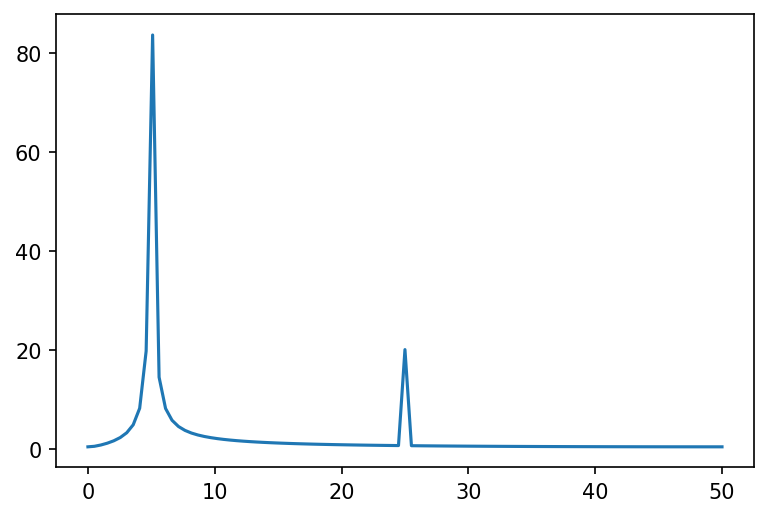

In [28]:
filtered_spectrum = new_wave.make_spectrum()
filtered_spectrum.plot()